<img src="https://pythongeeks.org/wp-content/uploads/2022/03/ml-xgboost-introduction.webp" width=80% />

# Topics:

-  What is XGBoost (Review)
-  XGBoost in action (Regression)

## What is XGBoost?

XGBoost is an acronym for eXtreme Gradient Boosting. Developed by Tianqi Chen, it is an implementation of the gradient boosting algorithm. It is one of the most widely used tools amongst the various other tools available for the Distributed Machine Learning Community, more commonly referred to as DMLC. It is an ensemble learning method.
XGBoost is a algorithm for winning Machine Learning and Kaggle competitions...

# XGBoost in Action (Regression)

## Importing the libraries

In [ ]:
#!pip install xgboost

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
sk.__version__

'1.5.2'

## Load and Prepare Data

Dataset We will be using a dataset that encapsulates the carbon dioxide emissions generated from burning coal for producing electricity power in the United States of America between 1973 and 2016. Using XGBoost, we will try to predict the carbon dioxide emissions in jupyter notebook for the next few years.
  
### **Feature description table**

| **Feature Name** | **Data Type** | **Description**                          | **Example Value** |
|------------------|--------------|------------------------------------------|------------------|
| `YYYYMM`         | Integer      | Year and Month in `YYYYMM` format. This represents the time period for each observation. | `197301`         |
| `Value`          | Float        | The numerical value recorded for the corresponding time period. It could represent economic, climatic, or production-related metrics. | `72.076`         |

### Key Notes:
1. **Feature `YYYYMM`**:  
   - This is a **time-based feature** representing a specific month and year.
   - It can be used to plot trends and analyze seasonal or temporal patterns.

2. **Feature `Value`**:  
   - This is a **numerical feature** and can be analyzed using statistical measures (mean, median, standard deviation, etc.).  
   - It is suitable for **trend analysis** or building **time-series models**.



In [6]:
#Read the dataset and print the top 5 elements of the dataset
data = pd.read_csv('/content/sample_data/co2.csv')
data.head(5)

,YYYYMM,Value
0,197301,72.076
1,197302,64.442
2,197303,64.084
3,197304,60.842
4,197305,61.798


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  523 non-null    int64  
 1   Value   523 non-null    float64
 2   Month   523 non-null    float64
 3   Year    523 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 16.5 KB


#### We use Pandas to import the CSV file. We notice that the dataframe contains a column 'YYYYMM' that needs to be separated into 'Year' and 'Month' column. In this step, we will also remove any null values that we may have in the dataframe. Finally, we will retrieve the last five elements of the dataframe to check if our code worked. And it did!

In [7]:
data['Month'] = data.YYYYMM.astype(str).str[4:6].astype(float)
data['Year'] = data.YYYYMM.astype(str).str[0:4].astype(float)

In [9]:
data.shape

(523, 4)

In [10]:
data.drop(['YYYYMM'], axis=1, inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.tail(5)

,Value,Month,Year
518,72.840,3.0,2016.0
519,71.410,4.0,2016.0
520,82.510,5.0,2016.0
521,115.772,6.0,2016.0
522,135.958,7.0,2016.0


In [11]:
# check for data type
print(data.dtypes)

Value    float64
Month    float64
Year     float64
dtype: object


In [12]:
data.isnull().sum()

,0
Value,0
Month,0
Year,0


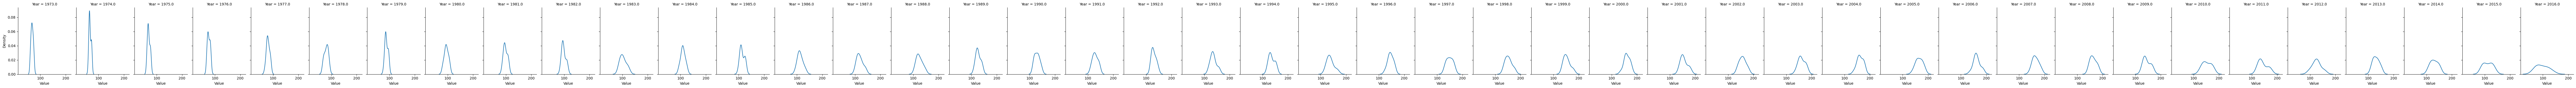

In [13]:
import warnings

warnings.filterwarnings('ignore')
g = sns.FacetGrid(data, col="Year", height=3.5, aspect=.65)
g.map(sns.kdeplot, 'Value')

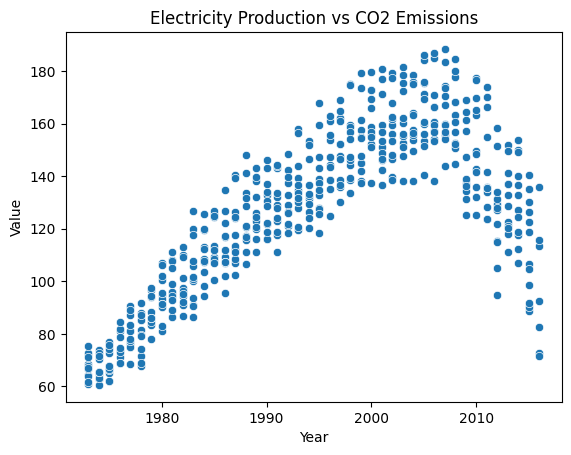

In [14]:
sns.scatterplot(x='Year', y='Value', data=data)
plt.title("Electricity Production vs CO2 Emissions")
plt.show()

In [15]:
X = data.loc[:,['Month', 'Year']].values
y = data.loc[:,'Value'].values

In [ ]:
y

In [16]:
data_dmatrix = xgb.DMatrix(X,label=y)

In [17]:
data_dmatrix

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(418, 2)
(418,)
(105, 2)
(105,)


In [19]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1,
    max_depth=7,
    gamma=0,
)
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [20]:
#After training the model, we'll check the model training score.
scores = cross_val_score(reg_mod, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.97


In [21]:
reg_mod.fit(X_train,y_train)

predictions = reg_mod.predict(X_test)

In [22]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 7.369991


In [23]:
from sklearn.metrics import r2_score
r2 = np.sqrt(r2_score(y_test, predictions))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.974818


### As you can see, the these statistical metrics have reinstated our confidence about this model. RMSE ~ 7.37 R-Squared Score ~ 98.8% Now, let's visualize the original data set using the seaborn library.

Text(0.5, 1.0, 'Annual CO2 Emissions')

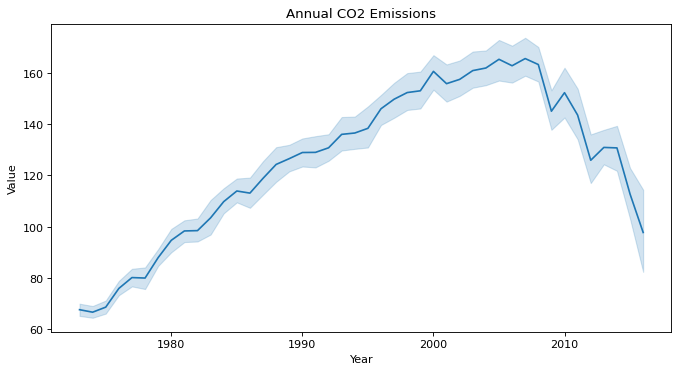

In [24]:

plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Year', y='Value', data=data)
plt.title("Annual CO2 Emissions")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, '1973.0'),
  Text(1, 0, '1974.0'),
  Text(2, 0, '1975.0'),
  Text(3, 0, '1976.0'),
  Text(4, 0, '1977.0'),
  Text(5, 0, '1978.0'),
  Text(6, 0, '1979.0'),
  Text(7, 0, '1980.0'),
  Text(8, 0, '1981.0'),
  Text(9, 0, '1982.0'),
  Text(10, 0, '1983.0'),
  Text(11, 0, '1984.0'),
  Text(12, 0, '1985.0'),
  Text(13, 0, '1986.0'),
  Text(14, 0, '1987.0'),
  Text(15, 0, '1988.0'),
  Text(16, 0, '1989.0'),
  Text(17, 0, '1990.0'),
  Text(18, 0, '1991.0'),
  Text(19, 0, '1992.0'),
  Text(20, 0, '1993.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1995.0'),
  Text(23, 0, '1996.0'),
  Text(24, 0, '1997.0'),
  Text(25, 0, '1998.0'),
  Text(26, 0, '1999.0'),
  Text(27, 0, '2000.0'),
  Text(28, 0, '2001.0'),
  Text(29, 0, '2002.0'),
  Tex

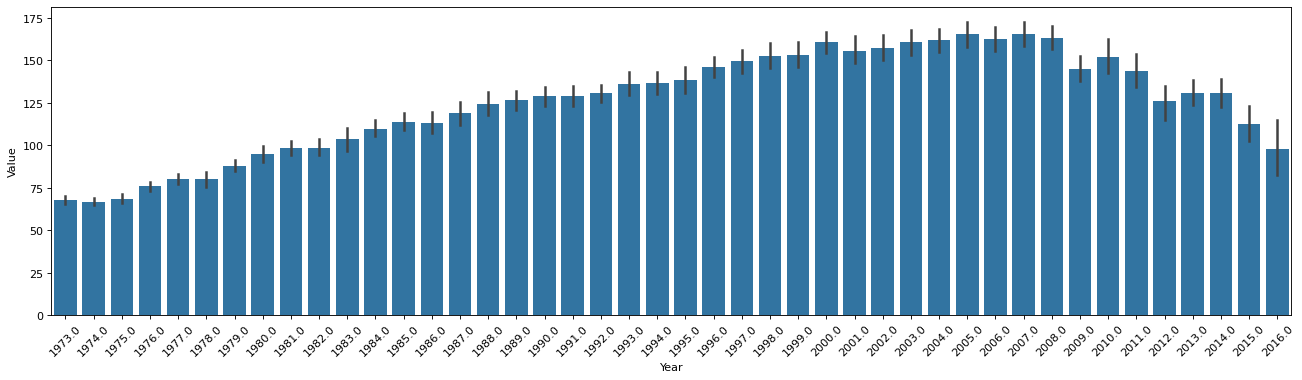

In [25]:
plt.figure(figsize=(20, 5), dpi=80)
sns.barplot(data,x='Year',y='Value')
plt.xticks(rotation=45)

      Year     Value
0   1973.0   811.791
1   1974.0   800.131
2   1975.0   823.740
3   1976.0   911.347
4   1977.0   962.143
5   1978.0   959.917
6   1979.0  1055.704
7   1980.0  1136.594
8   1981.0  1180.368
9   1982.0  1181.956
10  1983.0  1241.779
11  1984.0  1317.613
12  1985.0  1367.400
13  1986.0  1357.485
14  1987.0  1426.752
15  1988.0  1491.808
16  1989.0  1518.843
17  1990.0  1547.564
18  1991.0  1548.180
19  1992.0  1569.565
20  1993.0  1632.519
21  1994.0  1638.781
22  1995.0  1660.743
23  1996.0  1752.410
24  1997.0  1797.044
25  1998.0  1828.183
26  1999.0  1836.415
27  2000.0  1927.377
28  2001.0  1869.828
29  2002.0  1889.879
30  2003.0  1930.972
31  2004.0  1943.069
32  2005.0  1983.828
33  2006.0  1953.697
34  2007.0  1987.287
35  2008.0  1959.386
36  2009.0  1740.875
37  2010.0  1827.619
38  2011.0  1722.709
39  2012.0  1511.238
40  2013.0  1571.350
41  2014.0  1569.136
42  2015.0  1352.967
43  2016.0   684.401


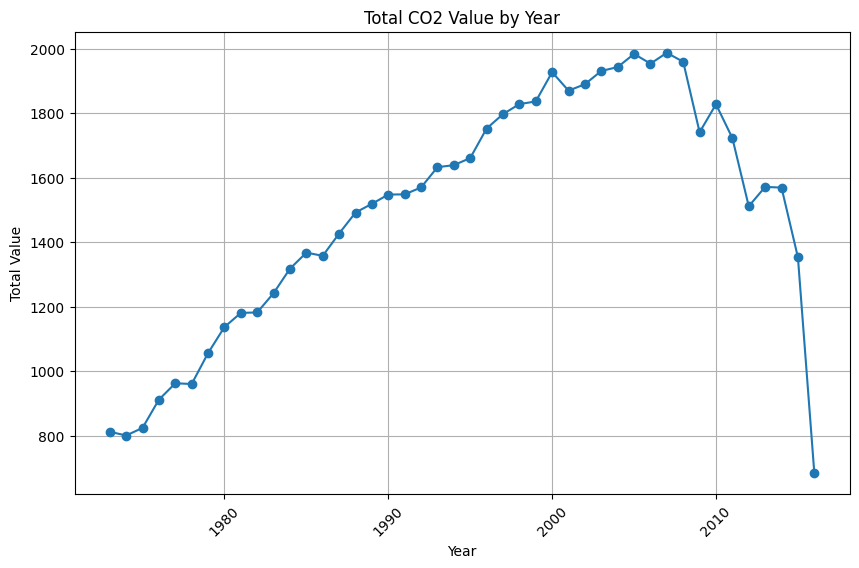

In [26]:
d1=data.groupby('Year')

yearly_sum = data.groupby('Year')['Value'].sum().reset_index()

print(yearly_sum)

yearly_sum.to_csv('Yearly_Value_Sum.csv', index=False)

plt.figure(figsize=(10, 6))
plt.plot(yearly_sum['Year'], yearly_sum['Value'], marker='o', linestyle='-')
plt.title('Total CO2 Value by Year')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()

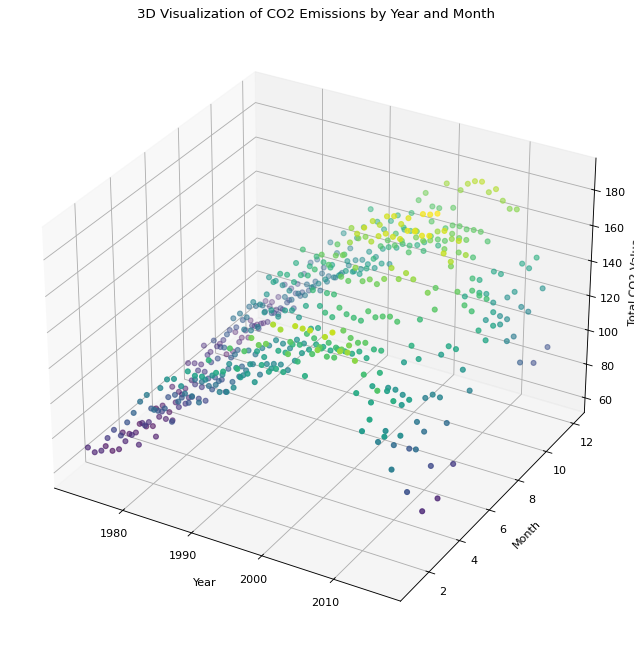

In [27]:
from mpl_toolkits.mplot3d import Axes3D

grouped = data.groupby(['Year', 'Month'])['Value'].sum().reset_index()

fig = plt.figure(figsize=(25, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(grouped['Year'],
           grouped['Month'],
           grouped['Value'],
           c=grouped['Value'],
           cmap='viridis',
           marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Total CO2 Value')
ax.set_title("3D Visualization of CO2 Emissions by Year and Month")

plt.show()

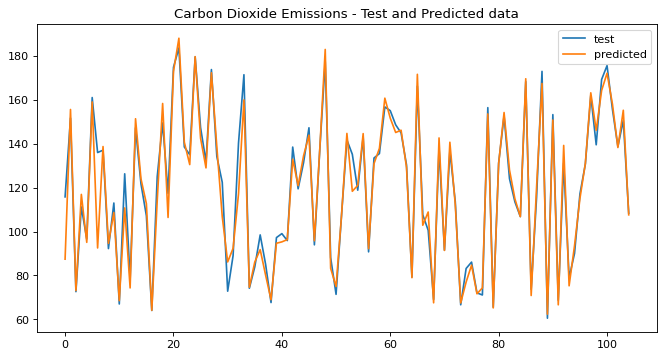

In [28]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

Finally, the last piece of code will print the forecasted carbon dioxide emissions until 2025.

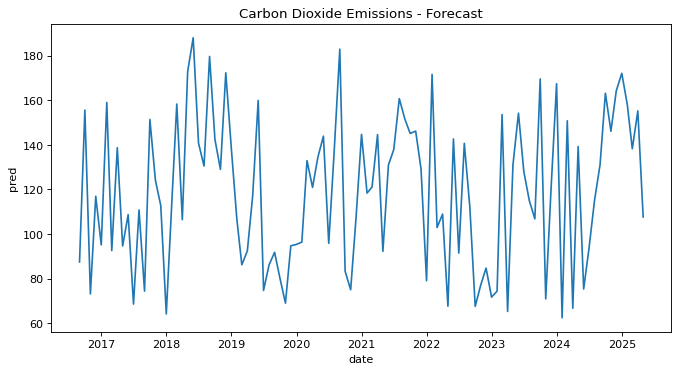

In [29]:

plt.figure(figsize=(10, 5), dpi=80)
df=pd.DataFrame(predictions, columns=['pred'])
df['date'] = pd.date_range(start='8/1/2016', periods=len(df), freq='ME')
sns.lineplot(x='date', y='pred', data=df)
plt.title("Carbon Dioxide Emissions - Forecast")
plt.show()